In [1]:
#Importing the needed modules
import numpy as np
from numpy import array
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#Following ensure that graph is on the same page
%matplotlib inline

## Simple linear regressions

In [18]:
# Define the stock symbols and date range
symbols = ['META', 'SPY', 'VUG','VBR']
start_date = '2018-01-01'
end_date = '2023-01-01'

# Download historical data
data = yf.download(symbols, start=start_date, end=end_date, group_by='ticker')

# Extract the adjusted closing prices
closing_prices=data[[('META','Adj Close'),('SPY','Adj Close'),('VUG','Adj Close'),('VBR','Adj Close')]]

# Resample the data to get monthly closing prices
monthly_closing_prices = closing_prices.resample('M').ffill()
monthly_closing_prices.head()

[*********************100%***********************]  4 of 4 completed


,META,SPY,VUG,VBR
,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,
2018-01-31,186.889999,255.980530,143.279083,120.231339
2018-02-28,178.320007,246.672943,139.092758,114.536919
2018-03-31,159.789993,239.911514,135.628326,115.464127
2018-04-30,172.000000,241.151443,136.001114,115.928062
2018-05-31,191.779999,247.013611,141.966217,121.165062


In [19]:
# Calculate monthly returns
returns = pd.DataFrame()
returns['META'] = monthly_closing_prices['META'].pct_change().dropna()
returns['SPY'] = monthly_closing_prices['SPY'].pct_change().dropna()
returns['VUG'] = monthly_closing_prices['VUG'].pct_change().dropna()
returns['VBR'] = monthly_closing_prices['VBR'].pct_change().dropna()
returns.head()

,META,SPY,VUG,VBR
Date,,,,
2018-02-28,-0.045856,-0.036361,-0.029218,-0.047362
2018-03-31,-0.103914,-0.027411,-0.024907,0.008095
2018-04-30,0.076413,0.005168,0.002749,0.004018
2018-05-31,0.115000,0.024309,0.043861,0.045175
2018-06-30,0.013244,0.005751,0.011528,0.003564


In [20]:
#Extracting META, VUG, VBR and S&P 500 data
x = returns.SPY
y = returns.META
z = returns.VUG
q = returns.VBR

#Perform linear regression for META on SPY
model1 = np.polyfit(x, y, 1)

# Perform linear regression for META on VUG
model2 = np.polyfit(z, y, 1)

# Perform linear regression for META on VBR
model3 = np.polyfit(q, y, 1)

Alpha and Beta for META:
Alpha (α): -0.010395592649380756
Beta (β): 1.1712239005300027


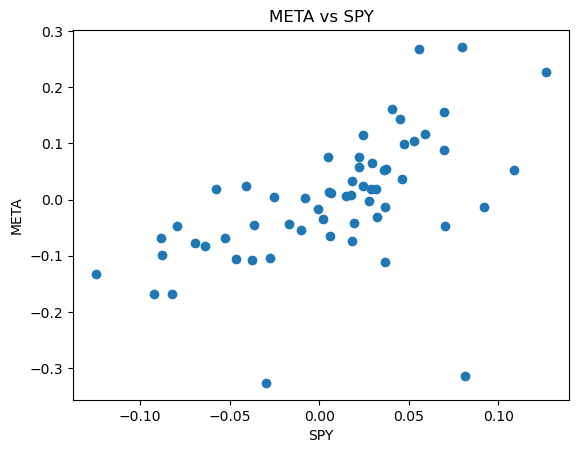

In [21]:
# Print alpha and beta for META on SPY
alpha = model1[1]
beta = model1[0]

print("Alpha and Beta for META:")
print("Alpha (α):", alpha)
print("Beta (β):", beta)
#Scatter plot of data
plt.scatter(returns.SPY,returns.META)
plt.xlabel("SPY")
plt.ylabel("META")
plt.title('META vs SPY')
plt.show()

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#F statistic
model = smf.ols('META ~ SPY', data=returns).fit()
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Percentage of variability in the range that can be explained by volume
#R-Squared
estimated=alpha+beta*x
residuals=y-estimated
r_squared=1-residuals.var()/y.var()
print("R-squared (Explained Variability):", r_squared)
percentage_variability_explained = (r_squared) * 100
print(f"Percentage of Variability Explained: {percentage_variability_explained:.2f}%")
print(model.summary())

F-statistic: 26.07253482393458
P-value: 3.951591933373894e-06
R-squared (Explained Variability): 0.31385264551266157
Percentage of Variability Explained: 31.39%
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     26.07
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.95e-06
Time:                        15:57:08   Log-Likelihood:                 56.696
No. Observations:                  59   AIC:                            -109.4
Df Residuals:                      57   BIC:                            -105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      


Alpha and Beta for META:
Alpha (α): -0.010389699867334413
Beta (β): 1.1061844322840635


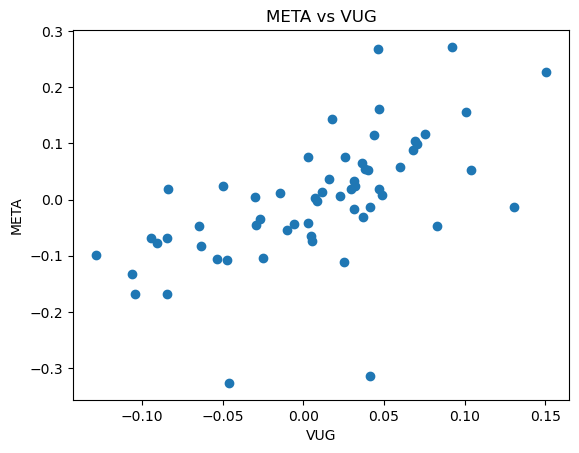

In [23]:
# Print alpha and beta for META on VUG
alpha = model2[1]
beta = model2[0]

print("\nAlpha and Beta for META:")
print("Alpha (α):", alpha)
print("Beta (β):", beta)
#Scatter plot of data
plt.scatter(returns.VUG,returns.META)
plt.xlabel("VUG")
plt.ylabel("META")
plt.title('META vs VUG')
plt.show()

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#F statistic
model = smf.ols('META ~ VUG', data=returns).fit()
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Percentage of variability in the range that can be explained by volume
#R-Squared
estimated=alpha+beta*z
residuals=y-estimated
r_squared=1-residuals.var()/y.var()
print("R-squared (Explained Variability):", r_squared)
percentage_variability_explained = (r_squared) * 100
print(f"Percentage of Variability Explained: {percentage_variability_explained:.2f}%")
print(model.summary())

F-statistic: 32.89849330891262
P-value: 3.8807812769828946e-07
R-squared (Explained Variability): 0.36595155378039057
Percentage of Variability Explained: 36.60%
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     32.90
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.88e-07
Time:                        15:57:09   Log-Likelihood:                 59.025
No. Observations:                  59   AIC:                            -114.1
Df Residuals:                      57   BIC:                            -109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     


Alpha and Beta for META:
Alpha (α): -0.005786214267413665
Beta (β): 0.7096492011587824


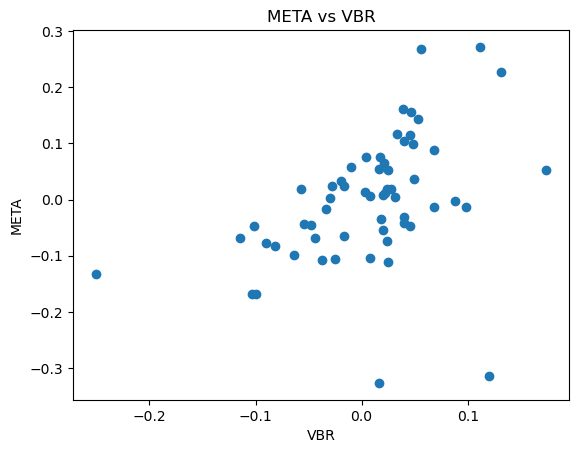

In [25]:
# Print alpha and beta for META on VBR
alpha = model3[1]
beta = model3[0]

print("\nAlpha and Beta for META:")
print("Alpha (α):", alpha)
print("Beta (β):", beta)
#Scatter plot of data
plt.scatter(returns.VBR,returns.META)
plt.xlabel("VBR")
plt.ylabel("META")
plt.title('META vs VBR')
plt.show()

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#F statistic
model = smf.ols('META ~ VBR', data=returns).fit()
f_statistic = model.fvalue
p_value = model.f_pvalue

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Percentage of variability in the range that can be explained by volume
#R-Squared
estimated=alpha+beta*q
residuals=y-estimated
r_squared=1-residuals.var()/y.var()
print("R-squared (Explained Variability):", r_squared)
percentage_variability_explained = (r_squared) * 100
print(f"Percentage of Variability Explained: {percentage_variability_explained:.2f}%")
print(model.summary())

F-statistic: 13.00115060285501
P-value: 0.0006557257222962044
R-squared (Explained Variability): 0.1857276700581083
Percentage of Variability Explained: 18.57%
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     13.00
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           0.000656
Time:                        15:57:10   Log-Likelihood:                 51.645
No. Observations:                  59   AIC:                            -99.29
Df Residuals:                      57   BIC:                            -95.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

## Multiple linear regressions: 2 variables

In [27]:
import statsmodels.api as sm
import numpy as np

x = returns[['SPY','VUG']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
summary = results.summary()
coefficients = results.params

print("\nAlpha and Betas for META:")
print("Alpha (α):", coefficients[0])
print("Beta (β) of SPY:", coefficients[1])
print("Beta (β) of VUG:", coefficients[2])

print(summary)


Alpha and Betas for META:
Alpha (α): -0.009995018786516142
Beta (β) of SPY: -0.42156436954233306
Beta (β) of VUG: 1.4584092585544206
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     16.41
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.46e-06
Time:                        15:57:12   Log-Likelihood:                 59.191
No. Observations:                  59   AIC:                            -112.4
Df Residuals:                      56   BIC:                            -106.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

In [28]:
import statsmodels.api as sm
import numpy as np

x = returns[['SPY','VBR']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
summary = results.summary()
coefficients = results.params

print("\nAlpha and Betas for META:")
print("Alpha (α):", coefficients[0])
print("Beta (β) of SPY:", coefficients[1])
print("Beta (β) of VBR:", coefficients[2])

print(summary)


Alpha and Betas for META:
Alpha (α): -0.012296105023308664
Beta (β) of SPY: 2.049843999228137
Beta (β) of VBR: -0.760174694308888
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     15.10
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           5.69e-06
Time:                        15:57:12   Log-Likelihood:                 58.308
No. Observations:                  59   AIC:                            -110.6
Df Residuals:                      56   BIC:                            -104.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


In [29]:
import statsmodels.api as sm
import numpy as np

x = returns[['VUG','VBR']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
summary = results.summary()
coefficients = results.params

print("\nAlpha and Betas for META:")
print("Alpha (α):", coefficients[0])
print("Beta (β) of VUG:", coefficients[1])
print("Beta (β) of VBR:", coefficients[2])

print(summary)


Alpha and Betas for META:
Alpha (α): -0.010593334323774043
Beta (β) of VUG: 1.3355206167544391
Beta (β) of VBR: -0.25695348799937845
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     16.77
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.96e-06
Time:                        15:57:13   Log-Likelihood:                 59.429
No. Observations:                  59   AIC:                            -112.9
Df Residuals:                      56   BIC:                            -106.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

## Multiple linear regressions: 3 variables

In [30]:
import statsmodels.api as sm
import numpy as np

x = returns[['SPY','VUG','VBR']]

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
summary = results.summary()
coefficients = results.params

print("\nAlpha and Betas for META:")
print("Alpha (α):", coefficients[0])
print("Beta (β) of SPY:", coefficients[1])
print("Beta (β) of VUG:", coefficients[2])
print("Beta (β) of VBR:", coefficients[3])

print(summary)


Alpha and Betas for META:
Alpha (α): -0.010974218119823975
Beta (β) of SPY: 0.3206989165669366
Beta (β) of VUG: 1.1583841572010953
Beta (β) of VBR: -0.35870290857272275
                            OLS Regression Results                            
Dep. Variable:                   META   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     11.01
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           9.09e-06
Time:                        15:57:15   Log-Likelihood:                 59.462
No. Observations:                  59   AIC:                            -110.9
Df Residuals:                      55   BIC:                            -102.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err        

In [31]:
x.corr()

,const,SPY,VUG,VBR
const,NaN,NaN,NaN,NaN
SPY,NaN,1.000000,0.955251,0.910366
VUG,NaN,0.955251,1.000000,0.803725
VBR,NaN,0.910366,0.803725,1.000000


## Comments

The simple linear regression analysis for META on SPY shows that index returns have an impact on stock's returns. The low p-value (<5%) and the F-statistic indicate a significative relationship. Approximately 31.4% of the variability in the stock's returns can be explained by SPY returns, as represented by the R-squared value. 
The simple linear regression analysis for META on VUG shows that index returns have an impact on stock's returns. The low p-value (<5%) and the F-statistic indicate a significative relationship. Approximately 36.6% of the variability in the stock's returns can be explained by SPY returns, as represented by the R-squared value. 
The simple linear regression analysis for META on VBR shows that index returns have an impact on stock's returns. The low p-value (<5%) and the F-statistic indicate a significative relationship. Approximately 18.6% of the variability in the stock's returns can be explained by SPY returns, as represented by the R-squared value. 

Therefore, considering the results of the different simple linear regressions, VUG has the greatest predictive power of FB, followed by SPY. This may be due to the fact the the weights of META and similar growth stocks are higher in VUG, in SPY are lower but still presents, and absents in VBR.

However, the correlations between the indices are high. It is interesting to notice that the multiple linear regression using VUG and VBR as predictors has a slightly higher predictive power (37,5%) than the one using VUG and SPY (37%) (the two most predictive indices). This is due to the fact that VUG is the most predictive index but correlation between VUG and SPY is much higher than correlation between VUG and VBR. So, VUG and VBR have less common information. Then, if we add the remaining index, and perform a three predictors multiple linear regression, the explained volatility remain at 37.5%.
Therefore, considering Multiple Linear Regressions, the volatility of META's returns explained by predictors does not increase by a considerable amount. Even if the F-statistic p-values show that the regression models are overall significative, the individual coefficients are not significative.